# AsCpf1 dataset

In [7]:
import pandas as pd
OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
OT_data.head()

C_OTSeqPosition1  G_OTSeqPosition1  T_OTSeqPosition1  A_OTSeqPosition1  \
0                 0                 0                 0                 1   
1                 0                 0                 1                 0   
2                 0                 0                 1                 0   
3                 0                 0                 1                 0   
4                 0                 0                 0                 1   

   C_OTSeqPosition2  G_OTSeqPosition2  T_OTSeqPosition2  A_OTSeqPosition2  \
0                 0                 0                 0                 1   
1                 0                 0                 1                 0   
2                 0                 0                 1                 0   
3                 0                 0                 1                 0   
4                 0                 0                 0                 1   

   C_OTSeqPosition3  G_OTSeqPosition3  ...  No_of_C  min free energy  \
0                 0                 0  ...        4             -5.1   
1                 0                 0  ...       10             -1.7   
2                 1                 0  ...        8             -5.4   
3                 0                 0  ...        9             -2.2   
4                 0                 0  ...        4             -2.4   

   melting_temp_gRNA  melting_temp_seed  melting_temp_non-seed  AAAA_OT  \
0          52.511310          -2.507032              35.591013        0   
1          64.360493          10.247946              37.604578        0   
2          63.181327         -23.103202              37.988172        0   
3          60.555625         -23.955524              35.799898        0   
4          50.197813          -7.460525              30.504561        0   

   TTTT_OT  GGGG_OT  CCCC_OT  Y  
0        0        0        0  0  
1        0        0        1  0  
2        0        0        0  0  
3        0        0        0  0  
4        0        0        0  0  

[5 rows x 654 columns]

# Distribution of nucleotides in positive off-targets

In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
OT_data=pd.read_csv("D://PhD_related/manuscript_obj1/seq_encoding_map/AsCpf1/AsCpf1-POT_HM-df1.csv", index_col=[0], encoding="cp1252")
index = ['A', 'T', 'G', 'C']
columns = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27"]
df = DataFrame(OT_data, index=index, columns=columns)
from matplotlib.pyplot import figure
figure(figsize=(30, 5), dpi=1600)
ax = sns.heatmap( df , linewidth = 0.75, cmap="Blues")
plt.xticks(font="Arial Rounded MT Bold", fontsize=25)
plt.yticks(font="Arial Rounded MT Bold", fontsize=25)
ax.set_aspect('equal', adjustable="box")
#plt.savefig('D://PhD_related/manuscript_obj1/graphs/heatmap_independent1.png', dpi=5000, bbox_inches = 'tight')
plt.show()


# Distribution of nucleotides in negative off-targets

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
OT_data=pd.read_csv("D://PhD_related/manuscript_obj1/seq_encoding_map/AsCpf1/AsCpf1-NOT_HM-df1.csv", index_col=[0], encoding="cp1252")
index = ['A', 'T', 'G', 'C']
columns = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27"]
df = DataFrame(OT_data, index=index, columns=columns)
from matplotlib.pyplot import figure
#sns.color_palette("crest", as_cmap=True)
figure(figsize=(30, 5), dpi=1600)
ax = sns.heatmap( df , linewidth = 0.75, cmap="Blues")
#ax.title.set_text('Spearman Correlation')
plt.xticks(font="Arial Rounded MT Bold", fontsize=25)
#plt.xlabel('Prediction models', font="Arial Rounded MT Bold", fontsize=28)
#plt.ylabel('Datasets', font="Arial Rounded MT Bold", fontsize=28)
plt.yticks(font="Arial Rounded MT Bold", fontsize=25)
#plt.title('Spearman correlation', font="Arial Rounded MT Bold", fontsize=18) 
ax.set_aspect('equal', adjustable="box")
#plt.savefig('D://PhD_related/manuscript_obj1/graphs/heatmap_independent1.png', dpi=5000, bbox_inches = 'tight')
plt.show()


# AdaboostClassifier

Adaboost classifier is the best performing classifier on AsCpf1 dataset with high precision and recall for positive off-targets compared to other classifiers

In [9]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sys import *

OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

ada= AdaBoostClassifier(n_estimators=88, learning_rate=0.641, random_state=0)
ada.fit(data_train, target_train)
Pred_labels = adaboost.predict(data_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))


off-target' :  [0 1]
[[14584    21]
 [   27   107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       0.84      0.80      0.82       134

    accuracy                           1.00     14739
   macro avg       0.92      0.90      0.91     14739
weighted avg       1.00      1.00      1.00     14739

0.8151518271038123
No Skill PR AUC: 0.818
Logistic ROC AUC 0.899
SpearmanrResult(correlation=0.8153695142581562, pvalue=0.0)


# Confusion matrix

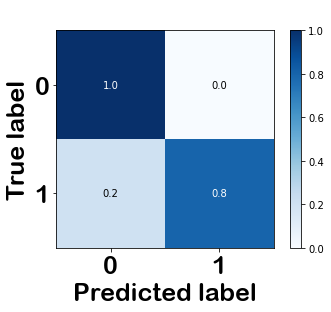

In [29]:
import itertools
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(target_test,Pred_labels, normalize=True)
plt.title(" ", font="Arial Rounded MT Bold", fontsize=25)
plt.xticks(font="Arial Rounded MT Bold", fontsize=25)
plt.xlabel('Predicted label', font="Arial Rounded MT Bold", fontsize=25)
plt.ylabel('True label', font="Arial Rounded MT Bold", fontsize=25)
plt.yticks(font="Arial Rounded MT Bold", fontsize=25)
ax.set_aspect('equal', adjustable="box")
#plt.savefig('D://PhD_related/manuscript_obj1/graphs/CM_AsCpf1.png', dpi=5000, aspect=1, fontname="Arial Rounded MT Bold", bbox_inches = 'tight')
plt.show()

# 10-fold cross-validation of AdaboostClassifier

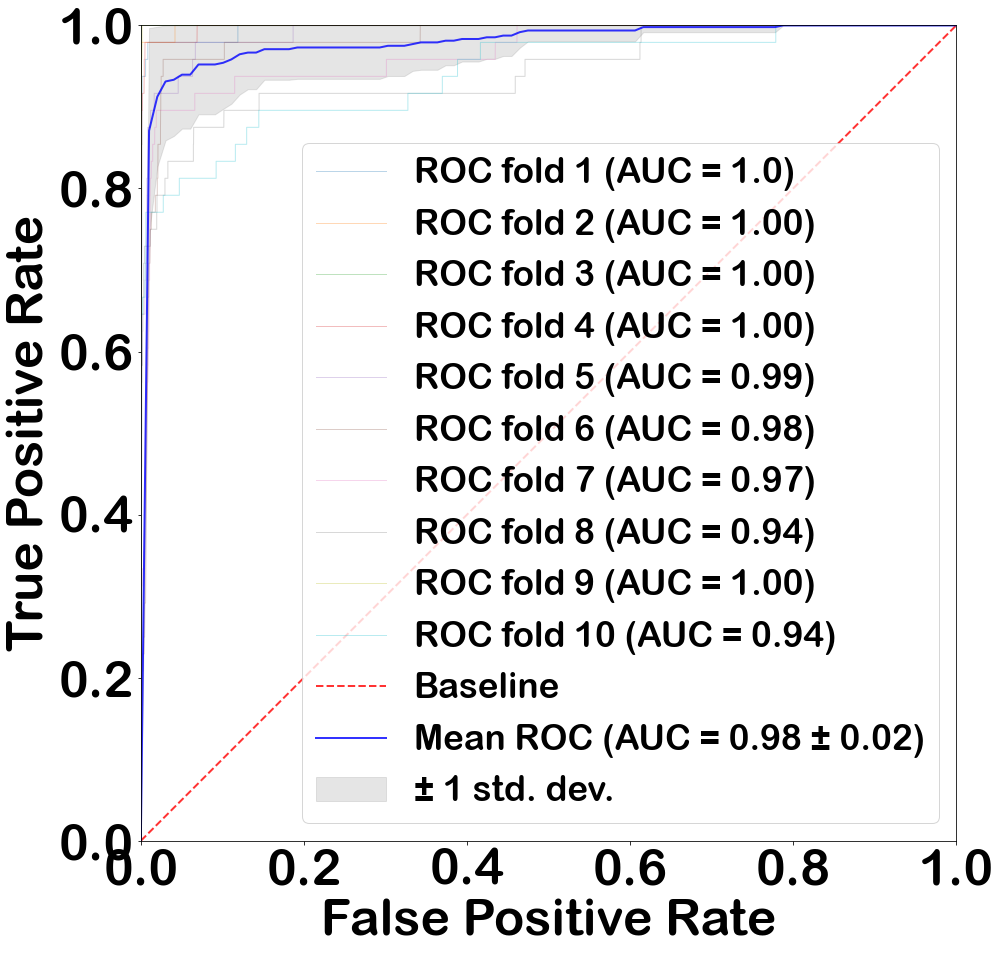

In [3]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import svm, metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier

OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
df = pd.DataFrame(OT_data)
Data = df[0:58954] 
Data1 = Data.drop(['Y'],axis=1)
Target = Data['Y']
Data1 = np.asarray(Data1)
Target = np.asarray(Target)

#10-stratified K-fold cross validation
TruePositives = []
AUCs = []
FalsePositives = np.linspace(0, 1, 100)
splits = StratifiedKFold(n_splits=10, random_state=None)
fig, ax = plt.subplots(figsize=(15,15))
iter=0
for training, validation in splits.split(Data1, Target): 
    iter=iter+1 
    Data_train, Data_test = Data1[training], Data1[validation] 
    Target_train, Target_test = Target[training], Target[validation]
    adaboost=AdaBoostClassifier(n_estimators=88, learning_rate=0.641, random_state=0)
    adaboost.fit(Data_train, Target_train)
    ROC_plt = plot_roc_curve(adaboost, Data_test, Target_test, name='ROC fold {}'.format(iter), alpha=0.3, lw=1, ax=ax)
    TruePosR = np.interp(FalsePositives, ROC_plt.fpr, ROC_plt.tpr)
    TruePosR[0] = 0.0
    TruePositives.append(TruePosR)
    AUCs.append(ROC_plt.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

TruePositivesM = np.mean(TruePositives, axis=0)
TruePositivesM[-1] = 1.0
AUCm = auc(FalsePositives, TruePositivesM)
AUCstd = np.std(AUCs)
ax.plot(FalsePositives, TruePositivesM, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (AUCm, AUCstd), lw=2, alpha=.8)

TruePositivesSTD = np.std(TruePositives, axis=0)
TruePosMax = np.minimum(TruePositivesM + TruePositivesSTD, 1)
TruePosMin = np.maximum(TruePositivesM - TruePositivesSTD, 0)
ax.fill_between(FalsePositives, TruePosMin, TruePosMax, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[0, 1], ylim=[0, 1])
ax.set_aspect('equal', adjustable="box")
#ax.legend(loc="lower right")
plt.xticks(font="Arial Rounded MT Bold", fontsize=50)
plt.xlabel('False Positive Rate', font="Arial Rounded MT Bold", fontsize=50)
plt.ylabel('True Positive Rate', font="Arial Rounded MT Bold", fontsize=50)
plt.yticks(font="Arial Rounded MT Bold", fontsize=50)
ax.legend(["ROC fold 1 (AUC = 1.0)", "ROC fold 2 (AUC = 1.00)", "ROC fold 3 (AUC = 1.00)", "ROC fold 4 (AUC = 1.00)", "ROC fold 5 (AUC = 0.99)", "ROC fold 6 (AUC = 0.98)", "ROC fold 7 (AUC = 0.97)", "ROC fold 8 (AUC = 0.94)", "ROC fold 9 (AUC = 1.00)", "ROC fold 10 (AUC = 0.94)", "Baseline", "Mean ROC (AUC = 0.98 ± 0.02)", "± 1 std. dev."], prop={"size":35, "family":'Arial Rounded MT Bold'}, loc="lower right")
#plt.savefig('D://PhD_related/manuscript_obj1/graphs/CV-ROC_LbCpf1-1.png', dpi=3000, bbox_inches = 'tight')
plt.show()

# SHAP analysis

In [ ]:
import shap
data_for_prediction = shap.sample(data_test, 50)
n1=ada.predict_proba(data_for_prediction)
data_for_prediction1 = shap.sample(data_train, 50)
k_explainer = shap.KernelExplainer(ada.predict, data_for_prediction1)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.initjs()
#shap.force_plot(k_explainer.expected_value, k_shap_values[1], data_for_prediction)

In [ ]:
shap.summary_plot(k_shap_values, features=data_for_prediction, feature_names=data_for_prediction.columns)

# Other models optimized on AsCpf1 dataset

# MLPClassifier

Second best performing model on AsCpf1 dataset

In [4]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
data = OT_data[features]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

mlp= MLPClassifier(solver='adam', alpha=0.0006, activation= 'relu', hidden_layer_sizes=[10,10,10], max_iter=500, learning_rate_init=0.0003, random_state=6, tol=0.00002, learning_rate='adaptive', n_iter_no_change=20, validation_fraction=0.25, verbose=True)
mlp.fit(data_train, target_train)

Pred_labels = mlp.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))

off-target' :  [0 1]
Iteration 1, loss = 0.21395034
Iteration 2, loss = 0.03788173
Iteration 3, loss = 0.03206342
Iteration 4, loss = 0.02791139
Iteration 5, loss = 0.02471459
Iteration 6, loss = 0.02190483
Iteration 7, loss = 0.01932214
Iteration 8, loss = 0.01719505
Iteration 9, loss = 0.01551946
Iteration 10, loss = 0.01405339
Iteration 11, loss = 0.01332802
Iteration 12, loss = 0.01231420
Iteration 13, loss = 0.01160176
Iteration 14, loss = 0.01113310
Iteration 15, loss = 0.01063210
Iteration 16, loss = 0.01016732
Iteration 17, loss = 0.01007936
Iteration 18, loss = 0.00970176
Iteration 19, loss = 0.00970251
Iteration 20, loss = 0.00921236
Iteration 21, loss = 0.00897783
Iteration 22, loss = 0.00875352
Iteration 23, loss = 0.00899504
Iteration 24, loss = 0.00849585
Iteration 25, loss = 0.00847887
Iteration 26, loss = 0.00821897
Iteration 27, loss = 0.00816235
Iteration 28, loss = 0.00809190
Iteration 29, loss = 0.00836407
Iteration 30, loss = 0.00807827
Iteration 31, loss = 0.00839

Mean shap values calculated from MLPClassifier (second best performing model)

In [ ]:
import shap
data_for_prediction = shap.sample(data_test, 50)
n1=ada.predict_proba(data_for_prediction)
data_for_prediction1 = shap.sample(data_train, 50)
k_explainer = shap.KernelExplainer(ada.predict, data_for_prediction1)
k_shap_values = k_explainer.shap_values(data_for_prediction)
shap.initjs()
#shap.force_plot(k_explainer.expected_value, k_shap_values[1], data_for_prediction)


# RandomForestClassifier

In [5]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

rf=RandomForestClassifier(n_estimators=300, max_depth=239, class_weight={0:0.13,1:0.8}, min_samples_leaf=9, max_features=239, random_state=6, n_jobs=2, verbose=True)
rf.fit(data_train, target_train)

Pred_labels = rf.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))

off-target' :  [0 1]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   12.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   53.5s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s


[[14549    56]
 [   16   118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       0.68      0.88      0.77       134

    accuracy                           1.00     14739
   macro avg       0.84      0.94      0.88     14739
weighted avg       1.00      1.00      1.00     14739

0.7638075397620288
No Skill PR AUC: 0.780
Logistic ROC AUC 0.938
SpearmanrResult(correlation=0.770469377693467, pvalue=0.0)


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished


# DecisionTreeClassifier

In [7]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

dtc= DecisionTreeClassifier(class_weight={0:0.25, 1:1},max_features=239, max_depth=1000, ccp_alpha=1e-10, random_state=0)
dtc.fit(data_train, target_train)

Pred_labels = dtc.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))


off-target' :  [0 1]
[[14539    66]
 [   22   112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       0.63      0.84      0.72       134

    accuracy                           0.99     14739
   macro avg       0.81      0.92      0.86     14739
weighted avg       1.00      0.99      0.99     14739

0.7149921421514684
No Skill PR AUC: 0.733
Logistic ROC AUC 0.916
SpearmanrResult(correlation=0.7223644227449092, pvalue=0.0)


# LogisticRegression

In [8]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

lg1=LogisticRegression(class_weight={0:0.5, 1:2}, C=1, max_iter=300, solver='newton-cg')
lg1.fit(data_train, target_train)

Pred_labels = lg1.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))

off-target' :  [0 1]
[[14544    61]
 [   19   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       0.65      0.86      0.74       134

    accuracy                           0.99     14739
   macro avg       0.83      0.93      0.87     14739
weighted avg       1.00      0.99      0.99     14739

0.739243622512728
No Skill PR AUC: 0.756
Logistic ROC AUC 0.927
SpearmanrResult(correlation=0.74626954602008, pvalue=0.0)


# LinearSVC

In [9]:
import warnings  
import pandas as pd
import numpy as np
np.random.seed(123)
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.svm import LinearSVC
from sys import *
OT_data=pd.read_csv("D://PhD_related/Dataset/Pragya_Ascpf1/AsCpf1_clean_dataset.csv", index_col=[0], encoding="cp1252")
#df = pd.DataFrame(OT_data)
le = preprocessing.LabelEncoder()
print("off-target' : ",OT_data['Y'].unique())
OT_data['Y'] = le.fit_transform(OT_data['Y'])
features = [col for col in OT_data.columns if col not in ['Y']]
target = OT_data['Y']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.25, shuffle=True)

svc=LinearSVC(C=0.02, loss='squared_hinge', penalty='l2', dual=False, tol=0.0001, class_weight={0:0.12, 1:0.7})
svc.fit(data_train, target_train)

Pred_labels = svc.predict(data_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(target_test,Pred_labels.round()))
print(classification_report(target_test,Pred_labels.round()))
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(target_test,Pred_labels.round()))
precision, recall, _ = precision_recall_curve(target_test,Pred_labels.round())
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_test,Pred_labels.round())
print('Logistic ROC AUC %.3f' % roc_auc)
from scipy.stats import spearmanr
print(spearmanr(target_test,Pred_labels.round()))

off-target' :  [0 1]
[[14557    48]
 [   25   109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14605
           1       0.69      0.81      0.75       134

    accuracy                           1.00     14739
   macro avg       0.85      0.91      0.87     14739
weighted avg       1.00      1.00      1.00     14739

0.7466555591476565
No Skill PR AUC: 0.755
Logistic ROC AUC 0.905
SpearmanrResult(correlation=0.7490455948560197, pvalue=0.0)


# Precision-Recall curve of all the models

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

#ax = plt.gca()
fig, ax = plt.subplots(figsize=(20, 20), dpi=1000)

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks(font="Arial Rounded MT Bold", fontsize=50)
plt.xlabel('Recall (Predicted label:1)', font="Arial Rounded MT Bold", fontsize=70)
plt.ylabel('Precision (Predicted label:1)', font="Arial Rounded MT Bold", fontsize=70)
plt.yticks(font="Arial Rounded MT Bold", fontsize=50)
scv1=plot_precision_recall_curve(mlp, data_test, target_test, linewidth = 6, ax=ax) 
scv2=plot_precision_recall_curve(rf, data_test, target_test, linewidth = 6, ax=ax)
scv3=plot_precision_recall_curve(svc, data_test, target_test, linewidth = 6, ax=ax)
scv3=plot_precision_recall_curve(lg1, data_test, target_test, linewidth = 6, ax=ax)
scv3=plot_precision_recall_curve(dtc, data_test, target_test, linewidth = 6, ax=ax)
scv3=plot_precision_recall_curve(adaboost, data_test, target_test, linewidth = 6, ax=ax)
scv1.plot(ax=ax)
ax.legend(["MLPClassifer (Ap=0.86)", "RandomForestClassifier(AP = 0.88)", "LinearSVC (AP = 0.80)", "LogisticRegrgession (AP = 0.84)", "DecisionTreeClassifier (AP = 0.66)", "AdaboostClassifier (AP = 0.90)"], prop={"size":50, "family":'Arial Rounded MT Bold'}, loc="lower left")
plt.show()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:    0.1s finished
